# Analysis first of the variants and of which mutations are shared and unique between the three variants

We're interesting in identifying which mutations confer the unique activity.

We can make inferences based on the general lineage data and then go and verify these with the data from the LevSeq examples.

In [243]:
import pandas as pd

df = pd.read_csv('lineage_summary.csv')
df['name'] = [f'{l}_{n}' for l, n in df[['linage', 'name']].values]
df

,linage,enantiomer,name,mutation,codon,AA,DNA
0,NOPiv,1,NOPiv_G0,#PARENT#,#PARENT#,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDVMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
1,NOPiv,1,NOPiv_G1,V89I,ATA,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDVMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
2,NOPiv,1,NOPiv_G2,V38I,ATA,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
3,NOPiv,1,NOPiv_G3,A93L,CTT,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
4,NOPiv,1,NOPiv_G4,I149L,CTT,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
5,NOPiv,1,NOPiv_G5-1,L93I,ATT,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
6,NOPiv,1,NOPiv_G6-1,L86C,TGT,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
7,NOPiv,1,NOPiv_G7-1,A59V,GTT,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
8,NOPiv,1,NOPiv_G11-1,I38M_K43M_E115E_V127L_S186S,ATG_ATG_GAG_CTC_TCG,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDMMYLKMAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
9,NOPiv,2,NOPiv_G5-2,L93F,TTT,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...


# Question 1: Which mutations are unique o H2NOH 

In [244]:
from sciutil import SciUtil

u = SciUtil()

h2noh = df[df['linage'] == 'H2NOH']
h2noh_mutations = set(h2noh['mutation'])

# Also look at the NOPiv mutations
nopiv = df[df['linage'] == 'NOPiv']
nopiv_mutations = set(nopiv['mutation'])

u.dp(['Mutations in both: ', set(nopiv_mutations & h2noh_mutations)])
u.dp(['Mutations in NOPiv: ', [x for x in nopiv_mutations if x not in h2noh_mutations]])
u.dp(['Mutations in H2NOH: ', [x for x in h2noh_mutations if x not in nopiv_mutations]])

# What about mutation positions
positions_nopiv = []
for aa in nopiv_mutations:
    if aa !=  '#PARENT#':
        aa = aa.replace('*', '')
        for a in aa.split('_'):
            positions_nopiv.append(int(a[1:-1]))

positions_h2noh = []
for aa in h2noh_mutations:
    if aa !=  '#PARENT#':
        aa = aa.replace('*', '')
        for a in aa.split('_'):
            positions_h2noh.append(int(a[1:-1]))
            
u.dp(['Positions in both: ', set(set(positions_nopiv) & set(positions_h2noh))])
u.dp(['Positions in NOPiv only: ', set([x for x in positions_nopiv if x not in positions_h2noh])])
u.dp(['Positions in H2NOH only: ', set([x for x in positions_h2noh if x not in positions_nopiv])])


--------------------------------------------------------------------------------
                       Mutations in both: 	{'#PARENT#'}	                        
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Mutations in NOPiv: 	['T56A', 'R90T', 'I55V_L196P', 'I38M_K43M_E115E_V127L_S186S', 'L86M', 'V178M', 'L56T', 'V89I', 'L93F', 'I149L', 'L86C', 'A93L', 'A59V', 'M86C', 'W62V', 'V38I', 'L93I']	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Mutations in H2NOH: 	['L22L_K29M_V31V_L33L_A45A_G61R_A144A_S163S_I167V_W174L', 'R13R_A59M_I149L', 'V131V_V134A_P196L*_Q197E*', 'V116R', 'T2A_M29T', 'L196P_E197Q', 'W62Y', 'L86F']	
--------------------------------------------------------------------------------
---------------------------------------------------------------

In [246]:
from sciutil import SciUtil

u = SciUtil()

h2noh = df[df['linage'] == 'H2NOH']
h2noh_mutations = set(h2noh['mutation'])

# Also look at the NOPiv mutations
nopiv = df[df['linage'] == 'NOPiv']
nopiv_1 = nopiv[nopiv['enantiomer'] == 1]
nopiv_2 = nopiv[nopiv['enantiomer'] == 2]

nopiv_1_mutations = set(nopiv_1['mutation'])
nopiv_2_mutations = set(nopiv_2['mutation'])

u.dp(['Mutations in all: ', set(nopiv_1_mutations & h2noh_mutations & nopiv_2_mutations)])
u.dp(['Mutations in NOPiv: ', set(nopiv_1_mutations & nopiv_2_mutations)])
u.dp(['Mutations in NOPiv 1 only: ', [x for x in nopiv_1_mutations if (x not in h2noh_mutations and x not in nopiv_2_mutations)]])
u.dp(['Mutations in NOPiv 2 only: ', [x for x in nopiv_2_mutations if (x not in h2noh_mutations and x not in nopiv_1_mutations)]])
u.dp(['Mutations in H2NOH: ', [x for x in h2noh_mutations if (x not in nopiv_1_mutations and x not in nopiv_2_mutations)]])

# What about mutation positions
positions_1_nopiv = []
for aa in nopiv_1_mutations:
    if aa !=  '#PARENT#':
        aa = aa.replace('*', '')
        for a in aa.split('_'):
            positions_1_nopiv.append(int(a[1:-1]))

# What about mutation positions
positions_2_nopiv = []
for aa in nopiv_2_mutations:
    if aa !=  '#PARENT#':
        aa = aa.replace('*', '')
        for a in aa.split('_'):
            positions_2_nopiv.append(int(a[1:-1]))
            
positions_h2noh = []
for aa in h2noh_mutations:
    if aa !=  '#PARENT#':
        aa = aa.replace('*', '')
        for a in aa.split('_'):
            positions_h2noh.append(int(a[1:-1]))
            
u.dp(['Positions in all: ', set(set(positions_1_nopiv) & set(positions_h2noh) & set(positions_2_nopiv))])
u.dp(['Position in both NOPiv: ', set(set(positions_1_nopiv) & set(positions_2_nopiv))])
u.dp(['Position in both NOPiv and not H2NOH: ', [x for x in set(set(positions_1_nopiv) & set(positions_2_nopiv)) if x not in positions_h2noh]])

u.dp(['Positions in NOPiv 1 only: ', set([x for x in positions_1_nopiv if (x not in positions_h2noh and x not in positions_2_nopiv) ])])
u.dp(['Positions in NOPiv 2 only: ', set([x for x in positions_2_nopiv if (x not in positions_h2noh and x not in positions_1_nopiv) ])])

u.dp(['Positions in H2NOH only: ', set([x for x in positions_h2noh if (x not in positions_1_nopiv and x not in positions_2_nopiv)])])
u.dp(['Positions in H2NOH and NOPiv 1 only: ', set([x for x in positions_h2noh if x in positions_1_nopiv and x not in positions_2_nopiv])])
u.dp(['Positions in H2NOH and NOPiv 2 only: ', set([x for x in positions_h2noh if x in positions_2_nopiv and x not in positions_1_nopiv])])


--------------------------------------------------------------------------------
                           Mutations in all: 	set()	                            
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                         Mutations in NOPiv: 	{'A59V'}	                         
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Mutations in NOPiv 1 only: 	['I38M_K43M_E115E_V127L_S186S', 'V89I', 'I149L', 'L86C', 'A93L', 'V38I', 'L93I']	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Mutations in NOPiv 2 only: 	['T56A', 'R90T', 'I55V_L196P', 'L86M', 'V178M', 'L56T', 'L93F', 'M86C', 'W62V']	
----------------------------------------------------

# The next thing we want to do is to check whether the H2NOH mutations can be "put" into the NOPiv variants

We want to rank them by the liklihood of them being able to add access to H2NOH. 

First, we're going to look through the campaigns and see if they appeared multiple times. And if they had any epistatic interactions (if so we need to highlight those ones)

## Map them to their respective parent

'20241115-JR-SSM-NOPiv.csv' doesn't have a parent?


In [247]:
df['name'] = [d.replace('*', '') for d in df['name'].values]
parent_to_name = dict(zip(df.AA, df.name))

In [248]:
# get all the sequnence function files and see what those specific mutations did
# Also did any of the other mutations appear in the H2NOH files
import os

base_dir = 'LCMS/NOPiv-linage'
all_dfs = {}
all_df = pd.DataFrame()
for base_dir in ['LCMS/NOPiv-linage', 'LCMS/H2NOH-linage']:
    files = [f for f in os.listdir(base_dir) if '.csv' in f]

    for f in files:
        if f != '20241115-JR-SSM-NOPiv.csv':
            # Get all the sequence function files.
            run_name = f.replace('.csv', '')
            if os.path.exists(os.path.join(base_dir, run_name)):
                function_files = os.listdir(os.path.join(base_dir, run_name))
                
                all_function_df = pd.DataFrame()
                for function_file in function_files:
                    try:
                        # Barcode
                        barcode = function_file.split('.csv')[0].split('_')[-1]
                        function_df = pd.read_csv(f'{base_dir}/{run_name}/{function_file}', header=1)
                        # Now we want to line up the barcode with the file and then join on the wells
                        function_df['function_well'] = [x.split('-')[-1] if isinstance(x, str) else None for x in function_df['Sample Vial Number'].values]
                        function_df['function_barcode_plate'] = barcode
                        function_df['barcode_well'] = [f'{p}_{w}' for w, p in function_df[['function_well', 'function_barcode_plate']].values]
                        function_df['filename'] = function_file
                        all_function_df = pd.concat([all_function_df, function_df])
                    except:
                        print('fuction file', function_file)
                    # Now we want to join with the larger df 
                # Now join the two toegther 
                df = pd.read_csv(f'{base_dir}/{f}')
                
                df.columns = [c.lower() for c in df.columns]
                if 'barcode_plate' not in df.columns:
                    df = df.rename(columns={'protein sequence': 'aa_sequence'})
                    df['barcode_plate'] = df['plate'].values
                df['barcode_well'] = [f'{p}_{w}' for w, p in df[['well', 'barcode_plate']].values]
                # Join the two
                df.set_index('barcode_well', inplace=True)
                all_function_df.set_index('barcode_well', inplace=True)
                df = df.join(all_function_df, how='left')
                df.reset_index(inplace=True, drop=True)
                df['levSeq_filename'] = run_name
                if 'nucleotide_mutation' not in df.columns:
                    df = df.rename(columns={'variant': 'nucleotide_mutation', 
                                            'mutations': 'amino_acid_substitutions', 
                                            'aa_variant': 'aa_sequence',
                                           })
                df.columns = [c.replace(' ', '_') for c in df.columns]
                df = df[['barcode_plate',
                         'nucleotide_mutation',
                         'amino_acid_substitutions',
                         'well', 
                         'average_mutation_frequency', 
                         'alignment_count',
                         'aa_sequence',
                       'Sample_Acq_Order_No', 'Sample_Vial_Number', 'Sample_Name',
                       'Compound_Name', 'RT_[min]', 'Area', 'function_well',
                       'function_barcode_plate', 'filename', 'levSeq_filename']]
                df = df.loc[:,~df.columns.duplicated()].copy()
    
                #try:
                aa = df[df['amino_acid_substitutions'] == '#PARENT#']['aa_sequence'].values[0]
                df['campaign_name'] = parent_to_name.get(aa + '*')
                all_dfs[run_name] = df
                all_df = pd.concat([all_df, df])
                print('Success!', run_name)
                # except:
                #     print(run_name)
            #all_df['campaign_name'].value_counts()
all_df

Success! 20241011-JR-epPCR-NOPiv
Success! 20240603-JR-SSM-NOPiv
fuction file .csv
Success! 20240404-JR-SSM-NOPiv-E1
fuction file .csv
Success! 20240404-JR-SSM-NOPiv-E2
fuction file summary_2.xlsx
fuction file summary.xlsx
Success! 20241106-JR-SSM-NOPiv
Success! 20250122-JR-epPCR-NOPiv
Success! 20240416-JR-SSM-NOPiv
Success! 20240726-JR-epPCR-NOPiv
Success! 20250122-JR-epPCR-H2NOH
Success! 20250215_SSM-H2NOH
Success! 20250227_StEP-H2NOH
Success! 20240504-JR-StEP-H2NOH
Success! 20250319_SSM-H2NOH
Success! 20240517-JR-SSM-H2NOH
Success! 20240702-JR-epPCR-H2NOH
Success! 20241011-JR-epPCR-H2NOH
Success! 20241021-JR-epPCR-H2NOH
Success! 20240421-JR-SSM-H2NOH
Success! 20240603-JR-SSM-H2NOH
Success! 20250404_epPCR-H2NOH


,barcode_plate,nucleotide_mutation,amino_acid_substitutions,well,average_mutation_frequency,alignment_count,aa_sequence,Sample_Acq_Order_No,Sample_Vial_Number,Sample_Name,Compound_Name,RT_[min],Area,function_well,function_barcode_plate,filename,levSeq_filename,campaign_name
0,1,#PARENT#,#PARENT#,A1,NaN,26.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20241011-JR-epPCR-NOPiv,None
1,1,#PARENT#,#PARENT#,A2,NaN,508.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20241011-JR-epPCR-NOPiv,None
2,1,#PARENT#,#PARENT#,A3,NaN,942.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20241011-JR-epPCR-NOPiv,None
3,1,T93C_A107G_T610DEL_G611DEL_A612DEL,-,A4,0.918879,821.0,Deletion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20241011-JR-epPCR-NOPiv,None
4,1,T570C,#PARENT#,A5,0.968085,1128.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20241011-JR-epPCR-NOPiv,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,40,T193C_T420A_T553A,S65P_W185R,H8,0.928205,65.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,93,D6B-H8,D6B-H8,Pdt,1.08,77850.9941,H8,40,20250403_HMC_epPCR_PA_P8_40.csv,20250404_epPCR-H2NOH,None
764,40,#PARENT#,#PARENT#,H9,NaN,283.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,94,D6B-H9,D6B-H9,Pdt,1.082,407279.018,H9,40,20250403_HMC_epPCR_PA_P8_40.csv,20250404_epPCR-H2NOH,None
765,40,A29T,D10V,H10,0.937173,191.0,MTPSDIPGYVYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,95,D6B-H10,D6B-H10,Pdt,1.08,208648.1904,H10,40,20250403_HMC_epPCR_PA_P8_40.csv,20250404_epPCR-H2NOH,None
766,40,T78G_T204C_A317C_T408A_T470A_C600DEL,LEN,H11,0.914993,249.0,#DEL#,96,D6B-H11,D6B-H11,Pdt,NaN,NaN,H11,40,20250403_HMC_epPCR_PA_P8_40.csv,20250404_epPCR-H2NOH,None


In [250]:
all_df[all_df['levSeq_filename'] == '20250404_epPCR-H2NOH']['aa_sequence'].values[0]

'MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAADVLKDQVDEILDLMGRYVASNEHLIYYFSNPDTGEPIKEYFERVRARWGAWVLDTTCRDYNREWLDYQYERGLRHHRSKKGVTDGVRTAPNTPLRYLIAGIYPLTATIKPLLAEKGGSPEDVEGMYNALLKSVVLQVAIWSHPYTKENDWLEHHHHHH*'

In [253]:
g6_parent = 'MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAADVLKDQVDEILDLMGRYVASNEHLIYYFSNPDTGEPIKEYFERVRARWGAWVLDTTCRDYNREWLDYQYEVGLRHHRSKKGVTDGVRTAPNTPLRYLIAGIYPLTATIKPLLAEKGGSPEDVEGMYNALLKSVVLQVAIWSHPYTKENDWLEHHHHHH**'
levseq_parent = 'MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAADVLKDQVDEILDLMGRYVASNEHLIYYFSNPDTGEPIKEYFERVRARWGAWVLDTTCRDYNREWLDYQYERGLRHHRSKKGVTDGVRTAPNTPLRYLIAGIYPLTATIKPLLAEKGGSPEDVEGMYNALLKSVVLQVAIWSHPYTKENDWLEHHHHHH*'
list(g6_parent)[115], list(levseq_parent)[115]

('V', 'R')

In [255]:
g62_parent = 'MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAADVLKDQVDEILDLMGRWVASNEHLIYYFSNPDTGEPIKEYFERVRARWGAWVLDTTCRDYNREWLDYQYERGLRHHRSKKGVTDGVRTAPNTPLRYLIAGIYPLTATIKPLLAEKGGSPEDVEGMYNALLKSVVLQVAIWSHPYTKENDWLEHHHHHH*'
levseq_parent = list(levseq_parent)
g6_parent = list(g6_parent)
for i, aa in enumerate(list(g62_parent)):
    if aa != levseq_parent[i] or g6_parent[i] != aa:
        print('G6:', g6_parent[i], 'G62:', aa, 'LevSeq parent:', levseq_parent[i], i)

G6: Y G62: W LevSeq parent: Y 61
G6: V G62: R LevSeq parent: R 115


In [249]:
all_df = all_df[~all_df['Area'].isna()]
all_df['campaign_name'].value_counts()

campaign_name
H2NOH_G2      1072
NOPiv_G7-1     647
H2NOH_G5       645
H2NOH_G4       375
H2NOH_G3       352
NOPiv_G7-2     277
NOPiv_G9-2     234
Name: count, dtype: int64

In [262]:
no_parent_found = all_df[all_df['campaign_name'].isna()]
no_parent_found['levSeq_filename'].value_counts()

levSeq_filename
20240416-JR-SSM-NOPiv      558
20250404_epPCR-H2NOH       444
20250319_SSM-H2NOH         433
20250215_SSM-H2NOH         352
20241011-JR-epPCR-NOPiv    348
20241106-JR-SSM-NOPiv      298
20241021-JR-epPCR-H2NOH    297
20241011-JR-epPCR-H2NOH    248
20240702-JR-epPCR-H2NOH    212
20250227_StEP-H2NOH        191
Name: count, dtype: int64

In [261]:
no_parent_found['campaign_name'].value_counts()

campaign_name
H2NOH_G2      1072
NOPiv_G7-1     647
H2NOH_G5       645
H2NOH_G4       375
H2NOH_G3       352
NOPiv_G7-2     277
NOPiv_G9-2     234
Name: count, dtype: int64

In [258]:
all_df['campaign_name'].value_counts()

campaign_name
H2NOH_G2      1072
NOPiv_G7-1     647
H2NOH_G5       645
H2NOH_G4       375
H2NOH_G3       352
NOPiv_G7-2     277
NOPiv_G9-2     234
Name: count, dtype: int64

In [224]:
# Update the mutations to only be the final thing i.e. at that position 
h2noh_mutations_all = []
for h in h2noh_mutations:
    h = h.split('_')
    for hm in h:
        if hm != '#PARENT#':
            h2noh_mutations_all.append(hm[1:])
nopiv_1_mutations_all = []
for h in nopiv_1_mutations:
    h = h.split('_')
    for hm in h:
        if hm != '#PARENT#':
            nopiv_1_mutations_all.append(hm[1:])
nopiv_2_mutations_all = []
for h in nopiv_2_mutations:
    h = h.split('_')
    for hm in h:
        if hm != '#PARENT#':
            nopiv_2_mutations_all.append(hm[1:])
nopiv_2_mutations_all

['56A', '90T', '55V', '196P', '86M', '178M', '56T', '93F', '59V', '86C', '62V']

In [228]:
positions_h2noh_nopiv_2 = set([x for x in positions_h2noh if x in positions_2_nopiv and x not in positions_1_nopiv])
positions_h2noh_nopiv_1 = set([x for x in positions_h2noh if x in positions_1_nopiv and x not in positions_2_nopiv])

positions_mutated_throughout_campaign = []
files_w_issues = []
position_labels = []
mutation_labels = []
mutations_throughput_campaign = []
for aa, filename in all_df[['amino_acid_substitutions', 'filename']].values:
    position_label = []
    mutation_label = []
    if aa !=  '#PARENT#' and aa != '#N.A.#' and aa != '-' and aa != None:
        #try:
        aa = aa.replace('*', '')
        for a in aa.split('_'):
            try:
                p = int(a[1:-1])
            except:
                p = a
            a = a[1:]
            if p in positions_h2noh:
                position_label.append('H2NOH')
            if p in positions_1_nopiv:
                position_label.append('NOPiV_1')
            if p in positions_2_nopiv:
                position_label.append('NOPiV_2')
            if a in h2noh_mutations_all:
                mutation_label.append('H2NOH')
            if a in nopiv_1_mutations_all:
                mutation_label.append('NOPiV_1')
            if a in nopiv_2_mutations_all:
                mutation_label.append('NOPiV_2')
            positions_mutated_throughout_campaign.append(p)
            mutations_throughput_campaign.append(a)
        # except:
        #     files_w_issues.append(filename) #print(aa, filename)
    position_label = list(set(position_label))
    position_label.sort()
    if len(position_label) == 0:
        position_labels.append('Not used')
    else:
        position_labels.append(' '.join(position_label))
    mutation_label = list(set(mutation_label))
    mutation_label.sort()
    if len(mutation_label) == 0:
        mutation_labels.append('Not used')
    else:
        mutation_labels.append(' '.join(mutation_label))
len(set(positions_mutated_throughout_campaign)), len(set(files_w_issues))
all_df['position_labels'] = position_labels
all_df['mutation_labels'] = mutation_labels

In [229]:
all_df['mutation_labels'].value_counts()

mutation_labels
Not used                 5775
H2NOH NOPiV_1             398
H2NOH                     327
NOPiV_2                   167
NOPiV_1                   139
NOPiV_1 NOPiV_2            37
H2NOH NOPiV_2               9
H2NOH NOPiV_1 NOPiV_2       2
Name: count, dtype: int64

In [230]:
all_df['position_labels'].value_counts()

position_labels
Not used                 4365
H2NOH NOPiV_1 NOPiV_2     635
NOPiV_2                   600
H2NOH NOPiV_1             477
H2NOH                     299
NOPiV_1                   282
NOPiV_1 NOPiV_2           107
H2NOH NOPiV_2              89
Name: count, dtype: int64

In [231]:
all_df['mutation_labels'].value_counts()

mutation_labels
Not used                 5775
H2NOH NOPiV_1             398
H2NOH                     327
NOPiV_2                   167
NOPiV_1                   139
NOPiV_1 NOPiV_2            37
H2NOH NOPiV_2               9
H2NOH NOPiV_1 NOPiV_2       2
Name: count, dtype: int64

In [232]:
len(set(positions_h2noh) & set(positions_mutated_throughout_campaign)), len(set(positions_1_nopiv) & set(positions_mutated_throughout_campaign)), len(set(positions_2_nopiv) & set(positions_mutated_throughout_campaign)) 


(21, 10, 9)

In [233]:
all_df.reset_index(inplace=True)

# Map all mutations back to their respective parent

<Axes: xlabel='campaign_name', ylabel='Area'>

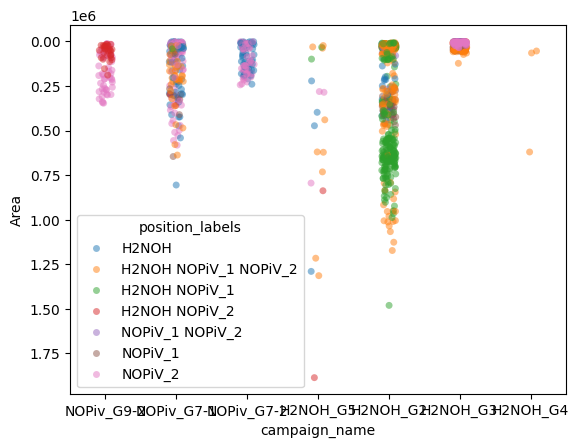

In [234]:
import seaborn as sns
#all_df.reset_index(inplace=True)
all_df = all_df[all_df['amino_acid_substitutions'] != '-']
hue_order = ['H2NOH', 'H2NOH NOPiV_1 NOPiV_2', 'H2NOH NOPiV_1', 'H2NOH NOPiV_2', 'NOPiV_1 NOPiV_2', 'NOPiV_1',  'NOPiV_2'] #  'Not used', 
# Great let's also annotate all mutations that were identified in the final variants or not 
used_df = all_df[all_df['position_labels'] != 'Not used']
used_df = used_df[~used_df['campaign_name'].isna()]
sns.stripplot(used_df, x='campaign_name', y='Area', hue='position_labels', hue_order=hue_order, alpha=0.5)

In [235]:
used_df['campaign_name'].value_counts()


campaign_name
H2NOH_G2      602
H2NOH_G3      275
NOPiv_G7-1    197
NOPiv_G7-2     98
NOPiv_G9-2     79
H2NOH_G5       20
H2NOH_G4        3
Name: count, dtype: int64

In [236]:
used_df['mutation_labels'].value_counts()

mutation_labels
Not used                 528
H2NOH NOPiV_1            398
H2NOH                    158
NOPiV_1                   99
NOPiV_2                   59
NOPiV_1 NOPiV_2           29
H2NOH NOPiV_1 NOPiV_2      2
H2NOH NOPiV_2              1
Name: count, dtype: int64

In [237]:
used_df['position_labels'].value_counts()

position_labels
H2NOH NOPiV_1 NOPiV_2    349
H2NOH NOPiV_1            329
NOPiV_2                  214
H2NOH                    152
NOPiV_1                  137
NOPiV_1 NOPiV_2           60
H2NOH NOPiV_2             33
Name: count, dtype: int64

<Axes: xlabel='campaign_name', ylabel='Area'>

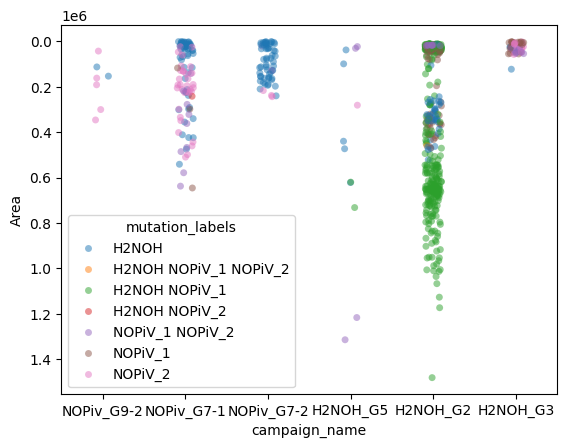

In [240]:
import seaborn as sns
used_df = used_df[used_df['mutation_labels'] != 'Not used']
#all_df = all_df[all_df['amino-acid_substitutions'] != '-']
hue_order = ['H2NOH', 'H2NOH NOPiV_1 NOPiV_2', 'H2NOH NOPiV_1', 'H2NOH NOPiV_2', 'NOPiV_1 NOPiV_2', 'NOPiV_1',  'NOPiV_2']
# Great let's also annotate all mutations that were identified in the final variants or not 
sns.stripplot(used_df, x='campaign_name', y='Area', hue='mutation_labels', hue_order=hue_order, alpha=0.5)

In [241]:
used_df[used_df['mutation_labels'] != 'Not used'] #.value_counts()

,level_0,index,barcode_plate,nucleotide_mutation,amino_acid_substitutions,well,average_mutation_frequency,alignment_count,aa_sequence,Sample_Acq_Order_No,...,Compound_Name,RT_[min],Area,function_well,function_barcode_plate,filename,levSeq_filename,campaign_name,position_labels,mutation_labels
319,353,6,5,C166A_T167C_T168G,L56T,A7,1.000000,49.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,8.0,...,Pdt,1.944,191240.6805,A7,5,JR-20240603-SSM-P1_5.csv,20240603-JR-SSM-NOPiv,NOPiv_G9-2,NOPiV_2,NOPiV_2
324,358,12,5,C166A_T167C_T168G,L56T,B1,0.977778,45.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,14.0,...,Pdt,1.942,300219.0794,B1,5,JR-20240603-SSM-P1_5.csv,20240603-JR-SSM-NOPiv,NOPiv_G9-2,NOPiV_2,NOPiV_2
331,365,19,5,C166A_T167C_T168G,L56T,B8,0.978495,31.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,21.0,...,Pdt,1.942,346091.0975,B8,5,JR-20240603-SSM-P1_5.csv,20240603-JR-SSM-NOPiv,NOPiv_G9-2,NOPiV_2,NOPiV_2
338,372,26,5,C166A_T167C_T168G,L56T,C3,0.958333,72.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,28.0,...,Pdt,1.942,161748.996,C3,5,JR-20240603-SSM-P1_5.csv,20240603-JR-SSM-NOPiv,NOPiv_G9-2,NOPiV_2,NOPiV_2
447,482,144,6,G185A_G186T,W62Y,E1,0.972973,37.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,50.0,...,Pdt,1.937,153092.9713,E1,6,JR-20240603-SSM-P2_combined_6.csv,20240603-JR-SSM-NOPiv,NOPiv_G9-2,H2NOH NOPiV_2,H2NOH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5900,6023,246,9,A445C_C447G,I149L,E7,0.939394,34.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDVMYLKKAAD...,56.0,...,Pdt,1.104,401497.9963,E7,9,Y85X-Y149X_9.csv,20240421-JR-SSM-H2NOH,H2NOH_G2,H2NOH NOPiV_1,H2NOH NOPiV_1
5906,6029,262,9,A445C_C447G,I149L,F11,0.953125,65.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDVMYLKKAAD...,72.0,...,Pdt,1.104,386728.5543,F11,9,Y85X-Y149X_9.csv,20240421-JR-SSM-H2NOH,H2NOH_G2,H2NOH NOPiV_1,H2NOH NOPiV_1
5909,6032,270,9,A445C_C447T,I149L,G7,0.955556,45.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDVMYLKKAAD...,80.0,...,Pdt,1.106,355013.676,G7,9,Y85X-Y149X_9.csv,20240421-JR-SSM-H2NOH,H2NOH_G2,H2NOH NOPiV_1,H2NOH NOPiV_1
5915,6038,283,9,A445C_C447T,I149L,H8,0.901575,127.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDVMYLKKAAD...,93.0,...,Pdt,1.104,413516.3021,H8,9,Y85X-Y149X_9.csv,20240421-JR-SSM-H2NOH,H2NOH_G2,H2NOH NOPiV_1,H2NOH NOPiV_1
